# IMDB 리뷰 감성 분류(Sentiment Analysis)
- 데이터 : IMDB movie reviews, 
 https://www.kaggle.com/c/word2vec-nlp-tutorial
- kaggle 가입 : https://www.kaggle.com/
- kgggle.json 다운로드 : `https://www.kaggle.com/<username>/account`

kaggle 패키지 설치

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kgpark88","key":"fbaa5f23aa5ea9df8205d227ee58f7c1"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-05 14:54:57           4288  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2479  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            575  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            260  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
! kaggle competitions download -c word2vec-nlp-tutorial

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 104MB/s]
 69% 9.00M/13.0M [00:00<00:00, 26.1MB/s]
100% 13.0M/13.0M [00:00<00:00, 32.8MB/s]
 50% 13.0M/26.0M [00:00<00:00, 63.9MB/s]
100% 26.0M/26.0M [00:00<00:00, 103MB/s] 
100% 12.6M/12.6M [00:00<00:00, 131MB/s]



In [ ]:
! ls -ltr

total 53112
drwxr-xr-x 1 root root     4096 Apr 21 13:39 sample_data
-rw-r--r-- 1 root root       64 May  5 15:06 kaggle.json
-rw-r--r-- 1 root root   282796 May  5 15:06 sampleSubmission.csv
-rw-r--r-- 1 root root 13585269 May  5 15:06 labeledTrainData.tsv.zip
-rw-r--r-- 1 root root 27243285 May  5 15:06 unlabeledTrainData.tsv.zip
-rw-r--r-- 1 root root 13258140 May  5 15:06 testData.tsv.zip


In [ ]:
! unzip unlabeledTrainData.tsv.zip
! unzip labeledTrainData.tsv.zip
! unzip testData.tsv.zip

Archive:  unlabeledTrainData.tsv.zip
  inflating: unlabeledTrainData.tsv  
Archive:  labeledTrainData.tsv.zip
  inflating: labeledTrainData.tsv    
Archive:  testData.tsv.zip
  inflating: testData.tsv            


In [ ]:
! ls -ltr

total 183552
-rw-r--r-- 1 root root 32724746 Jul 30  2014 testData.tsv
-rw-r--r-- 1 root root 33556378 Jul 30  2014 labeledTrainData.tsv
-rw-r--r-- 1 root root 67281491 Jul 30  2014 unlabeledTrainData.tsv
drwxr-xr-x 1 root root     4096 Apr 21 13:39 sample_data
-rw-r--r-- 1 root root       64 May  5 15:06 kaggle.json
-rw-r--r-- 1 root root   282796 May  5 15:06 sampleSubmission.csv
-rw-r--r-- 1 root root 13585269 May  5 15:06 labeledTrainData.tsv.zip
-rw-r--r-- 1 root root 27243285 May  5 15:06 unlabeledTrainData.tsv.zip
-rw-r--r-- 1 root root 13258140 May  5 15:06 testData.tsv.zip


In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 데이터 로드

In [ ]:
train_data = pd.read_csv('labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## 데이터 분석
- 데이터의 개수
- 리뷰의 문자 길이 분포
- 많이 사용된 단어
- 긍정, 부정 데이터(label)의 분포
- 리뷰의 단어 개수 분포

### 데이터 개수

In [ ]:
print(f'데이터 개수: {len(train_data)}')

데이터 개수: 25000


### 리뷰의 문자 길이 분포

In [ ]:
train_length = train_data['review'].apply(len)

In [ ]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

In [ ]:
train_length

0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of review')

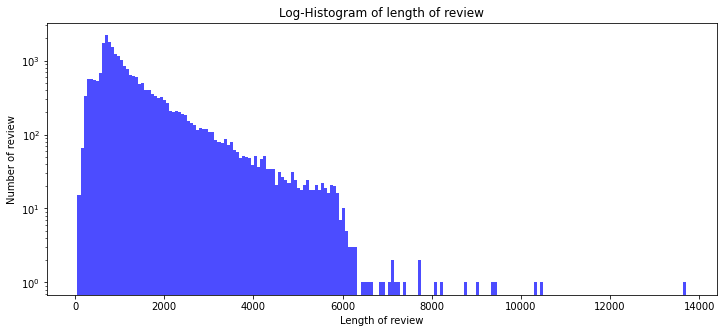

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.7, color= 'b', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [ ]:
print(f'리뷰 길이 최대 값: {np.max(train_length)}')
print(f'리뷰 길이 최소 값: {np.min(train_length)}')
print(f'리뷰 길이 평균 값: {np.mean(train_length):.2f}')
print(f'리뷰 길이 표준편차: {np.std(train_length):.2f}')
print(f'리뷰 길이 중간값: {np.median(train_length)}')
print(f'리뷰 길이 제 1 사분위: {np.percentile(train_length, 25)}')
print(f'리뷰 길이 제 3 사분위: {np.percentile(train_length, 75)}')

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


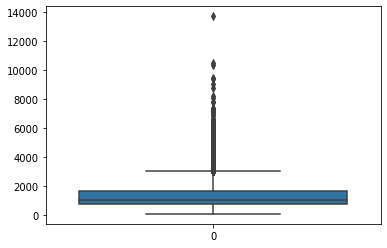

In [ ]:
sns.boxplot(orient = "v", data=train_length)

## 많이 사용된 단어 - Word Cloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(-0.5, 399.5, 199.5, -0.5)

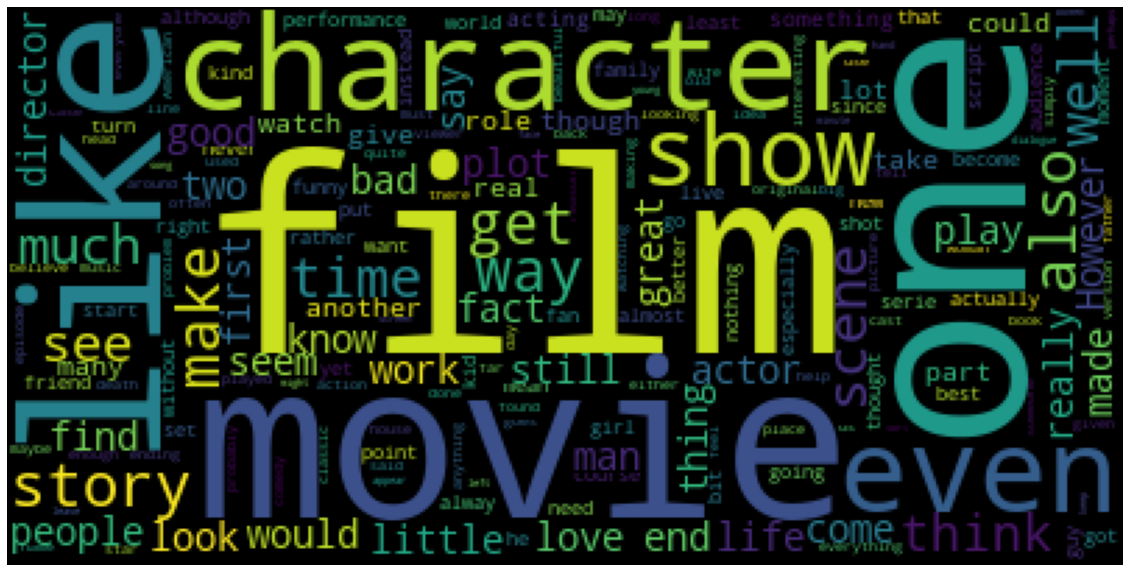

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# stopwords = ('br', 'the', 'of', 'to', 'be', 'is', 'was', 'this', 'it')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.add('br')

wordcloud = WordCloud(stopwords=stopwords)
wordcloud = wordcloud.generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off')

## 긍정, 부정 데이터의 분포

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


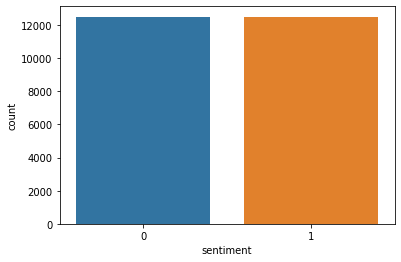

In [ ]:
sns.countplot(train_data['sentiment'])

In [ ]:
print(train_data['sentiment'].value_counts())

1    12500
0    12500
Name: sentiment, dtype: int64


### 리뷰의 단어 개수 분포

In [ ]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

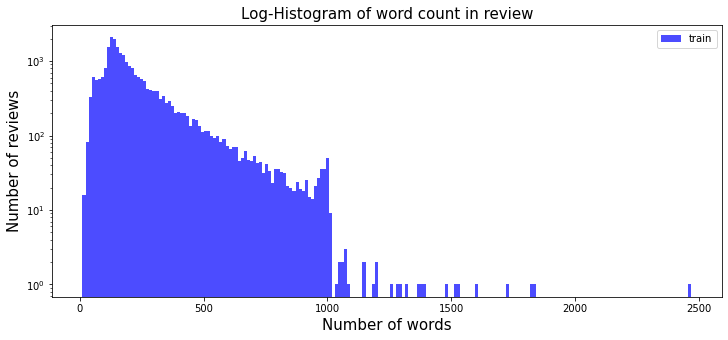

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=200,alpha=0.7, facecolor='b',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [ ]:
print(f'리뷰 단어 개수 최대 값: {np.max(train_word_counts)}')
print(f'리뷰 단어 개수 최소 값: {np.min(train_word_counts)}')
print(f'리뷰 단어 개수 평균 값: {np.mean(train_word_counts):.2f}')
print(f'리뷰 단어 개수 표준편차: {np.std(train_word_counts):.2f}')
print(f'리뷰 단어 개수 중간값: {np.median(train_word_counts)}')
print(f'리뷰 단어 개수 제 1 사분위: {np.percentile(train_word_counts, 25)}')
print(f'리뷰 단어 개수 제 3 사분위: {np.percentile(train_word_counts, 75)}')

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


## 데이터 전처리

In [ ]:
import re
import json
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train_data = pd.read_csv('labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)

## 전처리 함수
- HTML 태그 제거
- 영어가 아닌 특수문자들을 공백으로 바꾸기
- 대문자들을 소문자로 바꾸기
- 불용어 제거


In [ ]:
def preprocessing(review):   
    text = BeautifulSoup(review, "html5lib").get_text()	
    text = re.sub("[^a-zA-Z]", " ", text)
    words = text.lower().split()
    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]
    clean_text = ' '.join(words)
    return clean_text

In [ ]:
clean_train_data = []
for review in train_data['review']:
    clean_train_data.append(preprocessing(review))

print(clean_train_data[0])

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [ ]:
clean_train_df = pd.DataFrame({'review': clean_train_data, 'sentiment': train_data['sentiment']})

## 각 단어를 인덱스로 벡터화

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_data)
text_sequences = tokenizer.texts_to_sequences(clean_train_data)

In [ ]:
vocab = tokenizer.word_index
vocab["<PAD>"] = 0

In [ ]:
print("전체 단어 개수: ", len(vocab))

전체 단어 개수:  74066


In [ ]:
data_configs = {}

data_configs['vocab'] = vocab
data_configs['vocab_size'] = len(vocab)

In [ ]:
MAX_SEQUENCE_LENGTH = 200 

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 200)


In [ ]:
print(clean_train_data[1])
print(text_sequences[1])
print()
print(f"classic -> {data_configs['vocab']['classic']}")
print(f"war -> {data_configs['vocab']['war']}")
print(f"worlds -> {data_configs['vocab']['worlds']}")
print()
print(f"문장 길이 : {len(text_sequences[1])}")
print(f"인풋 길이 : {len(train_inputs[1])}")
print(train_inputs[1])


classic war worlds timothy hines entertaining film obviously goes great effort lengths faithfully recreate h g wells classic book mr hines succeeds watched film appreciated fact standard predictable hollywood fare comes every year e g spielberg version tom cruise slightest resemblance book obviously everyone looks different things movie envision amateur critics look criticize everything others rate movie important bases like entertained people never agree critics enjoyed effort mr hines put faithful h g wells classic novel found entertaining made easy overlook critics perceive shortcomings
[232, 203, 3048, 3565, 7116, 317, 2, 405, 153, 19, 634, 10967, 11898, 8816, 1653, 1035, 3494, 232, 154, 314, 7116, 2701, 178, 2, 2349, 87, 1111, 582, 217, 2219, 149, 73, 160, 626, 1035, 2882, 194, 642, 3316, 3464, 3869, 154, 405, 180, 155, 158, 79, 1, 19718, 2177, 1251, 68, 6828, 170, 281, 811, 1, 532, 10968, 4, 2003, 16, 36, 881, 1251, 376, 634, 314, 7116, 159, 2564, 1653, 1035, 3494, 232, 511, 143,

In [ ]:
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


## 전처리 데이터 저장

### 구글 드라이브 마운트(구글 코랩 환경에서 실행)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/nlpdata/imdb/'
TRAIN_DATA = 'train_input.npy'
TRAIN_LABEL = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

In [ ]:
# 전처리 된 데이터를 넘파이로 저장
np.save(open(DATA_PATH + TRAIN_DATA, 'wb'), train_inputs)
np.save(open(DATA_PATH + TRAIN_LABEL, 'wb'), train_labels)

# 정제된 텍스트를 csv로 저장
clean_train_df.to_csv(DATA_PATH + TRAIN_CLEAN_DATA, index=False)

# 데이터 사전을 json으로 저장
json.dump(data_configs, open(DATA_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [ ]:
test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review))

clean_test_df = pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
TEST_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID = 'test_id.npy'

np.save(open(DATA_PATH + TEST_DATA, 'wb'), test_inputs)
np.save(open(DATA_PATH + TEST_ID, 'wb'), test_id)
clean_test_df.to_csv(DATA_PATH + TEST_CLEAN_DATA, index = False)